# Trying out contour plots of our data to see where things might be the most different and if its worth exploring MSM further (could alternatively use UMAP)

In [1]:
import numpy as np
import seaborn as sns
import sys
sys.path.append('/zfshomes/lperez/summer2025/workspace')
from utilities.Analysis import systems_analysis

filtered_CCU_GCU_Trajectory_array = np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/redone_unrestrained_CCU_GCU_Trajectory_array.npy') 
filtered_CCU_CGU_Trajectory_array = np.load('/zfshomes/lperez/ba_and_ma/final_thesis_data/redone_unrestrained_CCU_CGU_Trajectory_array.npy')
systems=[filtered_CCU_GCU_Trajectory_array,filtered_CCU_CGU_Trajectory_array]

In [4]:
Systemsanalyzer=systems_analysis(systems)
X_pca,_,_=Systemsanalyzer.reduce_systems_representations()


X_pca shape (new data): (6400, 2)
the total explained variance ratio is 0.07621018588542938
weights shape: (2, 26106)
No color_mappings provided — defaulting to sample index gradient.


<Axes: >

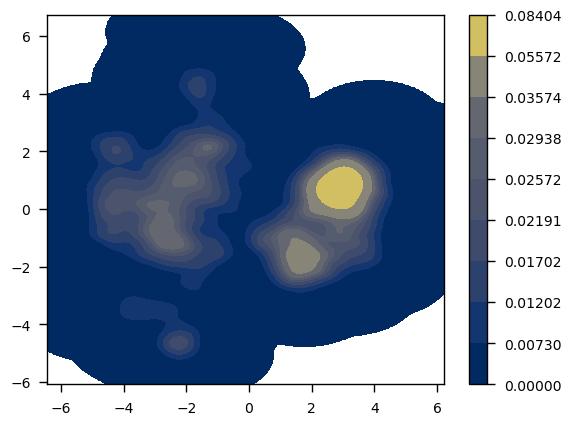

In [18]:
sns.kdeplot(
    x=X_pca[:, 0],  # PC1
    y=X_pca[:, 1],  # PC2
    fill=True,      # shaded contours
    cmap="cividis",
    levels=10,
    thresh=0,#only plots regions where values are greater than some threshold 
    bw_adjust=0.5,#wanted finer details which makes sense because we are looking for minority behaviors 
    cbar=True
)

In [22]:

GCU_pca = X_pca[0:3200, :]
CGU_pca = X_pca[3200:, :]

filler = np.full((3200, 2), 999)#filler values

GCU_pca_padded = np.vstack([GCU_pca, filler])#stack and were good
CGU_pca_padded = np.vstack([filler, CGU_pca])

<Axes: >

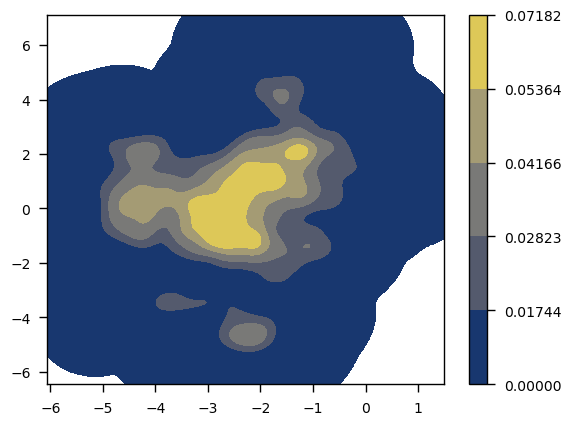

In [33]:
sns.kdeplot(
    x=GCU_pca[:, 0],  # PC1
    y=GCU_pca[:, 1],  # PC2
    fill=True,      # shaded contours
    cmap="cividis",
    levels=6,
    thresh=0,#only plots regions where values are greater than some threshold 
    bw_adjust=0.6,#wanted finer details which makes sense because we are looking for minority behaviors 
    cbar=True
)



<Axes: >

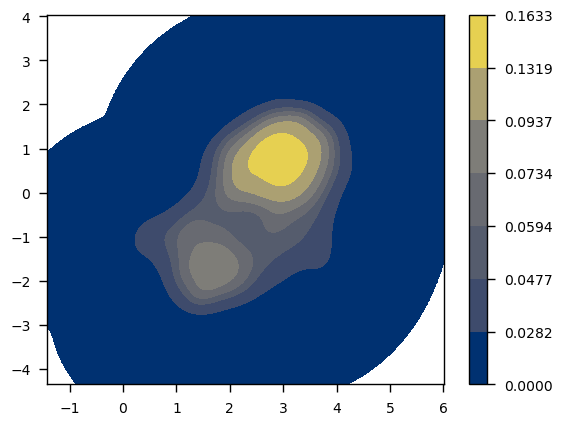

In [36]:
sns.kdeplot(
    x=CGU_pca[:, 0],  # PC1
    y=CGU_pca[:, 1],  # PC2
    fill=True,      # shaded contours
    cmap="cividis",
    levels=8,
    thresh=0,#only plots regions where values are greater than some threshold 
    #bw_adjust=,#wanted finer details which makes sense because we are looking for minority behaviors 
    cbar=True
)